In [24]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## 讀取資料集

In [41]:
import pandas as pd
df = pd.read_csv("data/bank-additional-full.csv", sep = ';')

In [42]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


## 資料前處理

In [43]:
df['y'].replace('no', 0, inplace = True)
df['y'].replace('yes', 1, inplace = True)

In [44]:
cat_var = ['job','marital','education',
              'default','housing','loan',
              'contact','month','day_of_week',
              'poutcome',]
num_var = ['age','duration','campaign','pdays','previous','emp.var.rate',
           'cons.price.idx','cons.conf.idx','euribor3m','nr.employed',]

In [45]:
bank_df = df['y']

for var in cat_var:
    bank_df = pd.concat([bank_df,pd.get_dummies(df[var])],axis=1)

bank_df = pd.concat([bank_df,df[num_var]],axis=1)

In [46]:
bank_df.head()

,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,0,0,0,1,0,0,0,0,0,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191
1,0,0,0,0,0,0,0,0,1,0,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191
2,0,0,0,0,0,0,0,0,1,0,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191
3,0,1,0,0,0,0,0,0,0,0,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191
4,0,0,0,0,0,0,0,0,1,0,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191


## 分為訓練與測試資料集

In [47]:
from sklearn.cross_validation import cross_val_score,train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(bank_df.drop('y', axis = 1), bank_df['y'])

## 建立模型

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

## 交叉驗證

In [50]:
print cross_val_score(clf, X_train, y_train)

[ 0.89132757  0.88686025  0.88550063]


## 產生預測結果

In [51]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.94      0.94      0.94      9131
          1       0.55      0.55      0.55      1166

avg / total       0.90      0.90      0.90     10297



## 計算AUC

In [52]:
probas_ = clf.fit(X_train, y_train).predict_proba(X_test)

In [53]:
from sklearn.metrics import roc_curve, auc

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.746871


## 繪製ROC Curve

In [55]:
import pylab as pl
pl.style.use('fivethirtyeight')
from IPython.core.pylabtools import figsize
figsize(12,5)

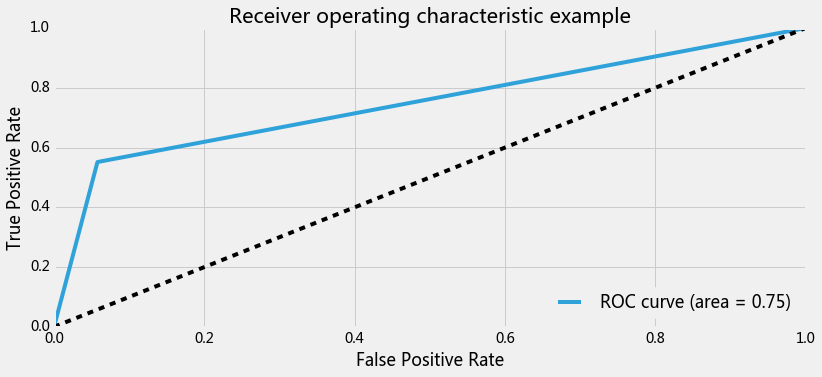

In [56]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

## 更替演算法 (使用Knearest Neighbor)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [60]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print cross_val_score(knn, X_train, y_train)

[ 0.90356414  0.90317568  0.90259299]


In [ ]:
probas2_ = knn.fit(X_train, y_train).predict_proba(X_test)

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, probas2_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.878049


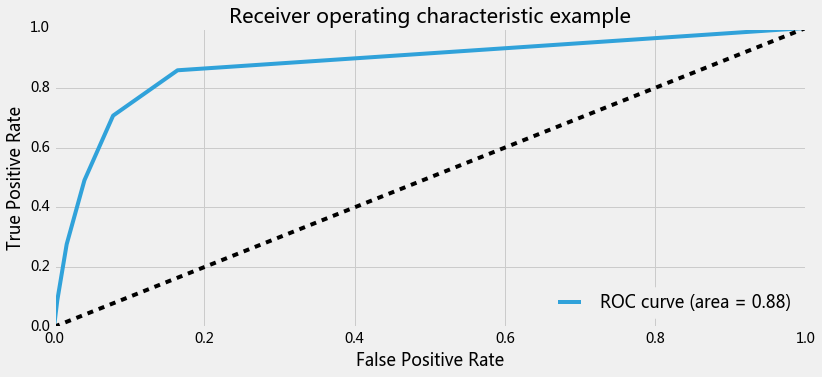

In [62]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

## 使用RandomForest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=201)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      9131
          1       0.68      0.47      0.55      1166

avg / total       0.91      0.92      0.91     10297



In [64]:
print cross_val_score(rfc, X_train, y_train)

[ 0.91201321  0.9125959   0.91356706]


In [65]:
probas3_ = rfc.fit(X_train, y_train).predict_proba(X_test)

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, probas3_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.944721


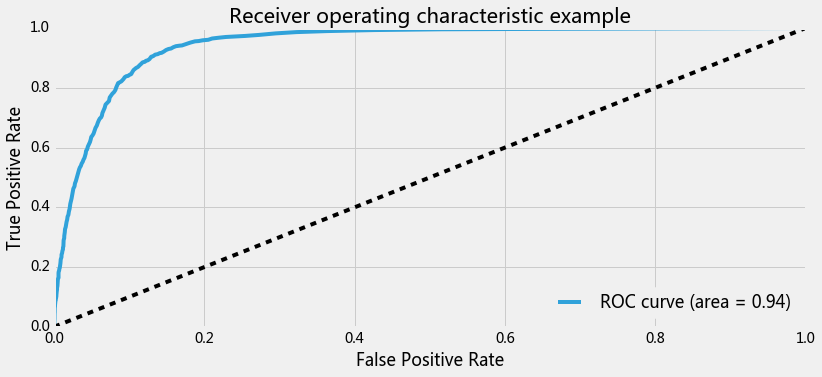

In [67]:
# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

## 找出最重要的變數

In [68]:
zip(rfc.feature_importances_,bank_df.drop('y', axis = 1).keys())

[(0.012431838665424015, 'admin.'),
 (0.0079946540990122519, 'blue-collar'),
 (0.0036825887272421945, 'entrepreneur'),
 (0.0032120751360192731, 'housemaid'),
 (0.0062546802619391807, 'management'),
 (0.0053469626268794765, 'retired'),
 (0.0042278045755774953, 'self-employed'),
 (0.006069395567383013, 'services'),
 (0.0041429548920038761, 'student'),
 (0.0099541136469806189, 'technician'),
 (0.0036815220035790312, 'unemployed'),
 (0.0015501903325818881, 'unknown'),
 (0.0070692633170384008, 'divorced'),
 (0.011813923661842239, 'married'),
 (0.011045908807152453, 'single'),
 (0.00049740258555916732, 'unknown'),
 (0.0059819992826545274, 'basic.4y'),
 (0.0040508264008621208, 'basic.6y'),
 (0.0078187048404298951, 'basic.9y'),
 (0.010924013603224389, 'high.school'),
 (0.00027988449627143854, 'illiterate'),
 (0.0084953884135037846, 'professional.course'),
 (0.011967319660337842, 'university.degree'),
 (0.0050885174015868461, 'unknown'),
 (0.0056120084166757589, 'no'),
 (0.005234860858519679, 'u